<a href="https://colab.research.google.com/github/christypreji/Medical-Insurance-Cost-Project/blob/main/Copy_of_Medical_Insurance_Cost_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEDICAL INSURANCE COST PROJECT

## Company Overview 🏭

### The project revolves around a Hospital ABC, a leading healthcare provider, aims to optimize its resource allocation and improve patient care by understanding the factors influencing medical costs for its patients. The company has identified a significant relationship between demographic factors, lifestyle-related information and health status with medical costs. Additionally the project will provide actionable insights for Hospital ABC to improve resource allocation, healthcare planning, and patient support services, ultimately enhancing the quality and accessibility of healthcare services for its patients.

## Data Overview 📊🔍

### The dataset includes information about patients demographics, lifestyle, health status and medical expenses. The dataset includes attributes such as age, gender, BMI, smoking status, region, as well as additional information like occupation, exercise frequency, chronic conditions, and more.

### Problem: Investigate the impact of insurance plan type, income level, and family medical history on healthcare expenses.

### Goal: Develop a predictive model to estimate medical costs for individual patients based on the collected features.

## Problem Solving Approach  

#### 1.Exploratory Data Analysis (EDA): Understand the dataset, identify patterns, and gain insights into the business.

#### 2.Data Cleaning: Address missing values, drop unnecessary columns, and prepare the data for analysis.

#### 3.Data Visualization: Create visualizations to understand the distribution, relationships, and trends in the data.

#### 4.Feature Engineering: Enhance the dataset by creating new features or modifying existing ones.

#### 5.Correlation Analysis: Investigate the relationships between variables to understand their impact on the target variable.

#### 6.Data Preprocessing: Encode categorical variables, scale numerical features, and prepare the data for modeling.

#### 7.Model Building: Implement multiple machine learning algorithms to predict the charges.

#### 8.Model Evaluation: Assess the performance of each model using metrics like Mean Squared Error and R-squared.

#### 9.Model Comparison: Identify the best-performing model based on evaluation metrics.

## Exploratory Data Analysis (EDA) 📊🔍
### Initial exploration of the dataset to understand its structure, size, and variable types.
### Identify key patterns, trends, and potential outliers.
### Utilize visualizations to gain insights into the distribution of various features.

## Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error

## Data Collection & Analysis

In [ ]:
# loading the data from csv file to a pandas DataFrame
insurance_dataset = pd.read_csv('/content/medical data - Sheet1.csv')

In [ ]:
# first 5 rows of the dataframe
insurance_dataset.head()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,62,M,23.39610,4,Yes,East,White Collar,Rarely,Heart Disease,HMO,...,Easy,High,NaN,NaN,NaN,Other,NaN,1.0,18.0,7604.947
1,65,M,22.03668,4,Yes,North,Retired,2 times/week,Heart Disease,HDHP,...,Easy,Low,Moderate,Yes,Moderate,Asthma,NaN,0.0,1.0,7067.338
2,71,M,23.03985,1,No,North,Retired,Rarely,NaN,HMO,...,Moderate,High,NaN,NaN,Moderate,Obesity,Yes,2.0,15.0,4478.128
3,18,F,24.82284,0,Yes,North,Self Employed,Daily,Arthritis,PPO,...,NaN,NaN,NaN,NaN,High,Cancer,No,3.0,9.0,12944.880
4,21,M,23.44420,1,No,North,Professional,Daily,Arthritis,HDHP,...,Easy,Low,NaN,Yes,Moderate,Other,NaN,0.0,17.0,8275.411


In [ ]:
#number of rows and columns
insurance_dataset.shape

(1000, 35)

In [ ]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1000 non-null   int64  
 1   Sex                            1000 non-null   object 
 2   BMI                            984 non-null    float64
 3   Children                       1000 non-null   int64  
 4   Smoker                         999 non-null    object 
 5   Region                         999 non-null    object 
 6   Occupation                     1000 non-null   object 
 7   Exercise_Frequency             1000 non-null   object 
 8   Chronic_Conditions             796 non-null    object 
 9   Insurance_Plan_Type            1000 non-null   object 
 10  Marital_Status                 1000 non-null   object 
 11  Distance_to_Nearest_Hospital   994 non-null    float64
 12  Income_Level                   1000 non-null   ob

## Categorical Factors
1. Sex
2. Smoker
3. Region
4. Chronic Condition
5. Environmental Factors


# **Data** **Cleaning**

In [ ]:
# Checking for and summing up duplicated rows in the dataset
insurance_dataset.duplicated().sum()

0

In [ ]:
# Checking for and summing up missing values in each column of the dataset
insurance_dataset.isnull().sum()

Age                                0
Sex                                0
BMI                               16
Children                           0
Smoker                             1
Region                             1
Occupation                         0
Exercise_Frequency                 0
Chronic_Conditions               204
Insurance_Plan_Type                0
Marital_Status                     0
Distance_to_Nearest_Hospital       6
Income_Level                       0
Family_Medical_History             0
Primary_Care_Physician_Visits      0
Mental_Health_Status               0
Prescription_Medication_Usage      0
Employment_Status                252
Education_Level                  198
Dietary_Habits                   241
Alcohol_Consumption              240
Sleep_Quality                    214
Stress_Level                     245
Medication_Adherence             311
Physical_Activity                254
Access_to_Healthcare             264
Social_Support                   230
E



*   Mean - Average value
*   Mode - Most repeated value



In [ ]:
# # Deleting unnecessary columns ('Employment_Status','Education_Level','Dietary_Habits','Alcohol_Consumption','Sleep_Quality','Stress_Level','Medication_Adherence','Physical_Activity','Access_to_Healthcare','Social_Support','Genetic_Predisposition','Health_Literacy_Level','Comorbidities','Access_to_Telemedicine','Emergency_Room_Visits','Healthcare_Utilization') in the dataset.
insurance_dataset = insurance_dataset.drop(columns=['Employment_Status','Education_Level','Dietary_Habits','Alcohol_Consumption','Sleep_Quality','Stress_Level','Medication_Adherence','Physical_Activity','Access_to_Healthcare','Social_Support','Genetic_Predisposition','Health_Literacy_Level','Comorbidities','Access_to_Telemedicine','Emergency_Room_Visits','Healthcare_Utilization'])

### The drop() function is used to remove rows or columns from a DataFrame


## **Handling Missing Values**

In [ ]:
# Filling missing values in the 'BMI' column with the mean value of that column in the dataset
insurance_dataset['BMI'].fillna(value=insurance_dataset['BMI'].mean(), inplace=True)

In [ ]:
# Filling missing values in the 'Distance_to_Nearest_Hospital' column with the mean value of that column in the dataset
insurance_dataset['Distance_to_Nearest_Hospital'].fillna(value=insurance_dataset['Distance_to_Nearest_Hospital'].mean(), inplace=True)

In [ ]:
# Filling missing values in the 'Smoker' column with the mode value of that column in the dataset
insurance_dataset['Smoker'].fillna(value=insurance_dataset['Smoker'].mode()[0], inplace=True)

In [ ]:
# Filling missing values in the 'Region' column with the mode value of that column in the dataset
insurance_dataset['Region'].fillna(value=insurance_dataset['Region'].mode()[0], inplace=True)

In [ ]:
# Filling missing values in the 'Chronic_Conditions' column with the mode value of that column in the dataset
insurance_dataset['Chronic_Conditions'].fillna(value=insurance_dataset['Chronic_Conditions'].mode()[0], inplace=True)

In [ ]:
# Filling missing values in the 'Environmental_Factors' column with the mode value of that column in the dataset
insurance_dataset['Environmental_Factors'].fillna(value=insurance_dataset['Environmental_Factors'].mode()[0], inplace=True)

In [ ]:
insurance_dataset.isnull().sum()

Age                              0
Sex                              0
BMI                              0
Children                         0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Chronic_Conditions               0
Insurance_Plan_Type              0
Marital_Status                   0
Distance_to_Nearest_Hospital     0
Income_Level                     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Environmental_Factors            0
Charges                          0
dtype: int64

## **Data Analysis**

In [ ]:
# statistical measures of the dataset
insurance_dataset.describe()

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Charges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.167000,25.096119,1.918000,10.623046,4.964000,10149.250960
std,18.009427,4.890251,1.428747,5.433499,2.599897,3006.201159
min,18.000000,8.889366,0.000000,1.000381,1.000000,1910.048000
25%,33.000000,21.950460,1.000000,5.932067,3.000000,8193.242000
50%,48.000000,25.214975,2.000000,10.905765,5.000000,10228.765000
75%,64.000000,28.144568,3.000000,15.263208,7.000000,12157.125000
max,79.000000,39.558080,4.000000,19.996930,9.000000,19139.980000


<ipython-input-17-8438ca997703>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['Age'])


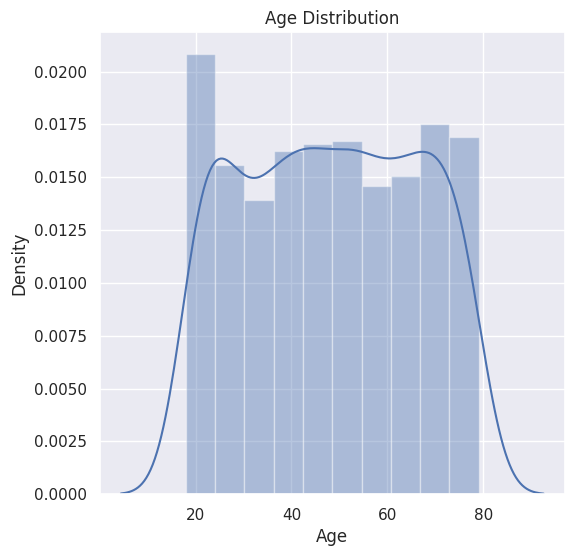

In [ ]:
# Distribution of Age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['Age'])
plt.title('Age Distribution')
plt.show()


<ipython-input-18-18a880b23044>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['BMI'])


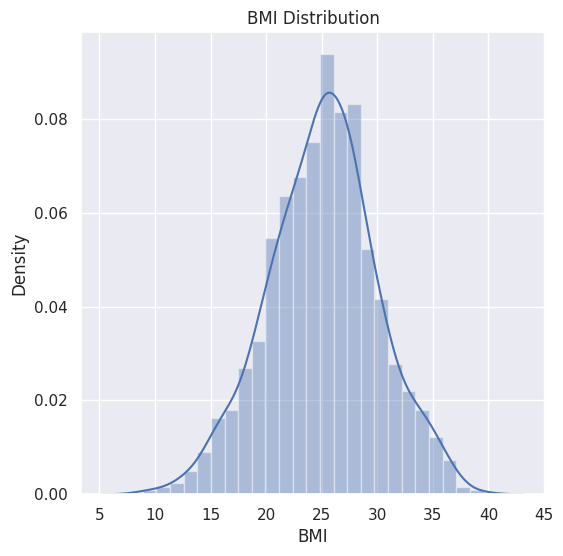

In [ ]:
# Distribution of BMI value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['BMI'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range is 18.5 to 24.9



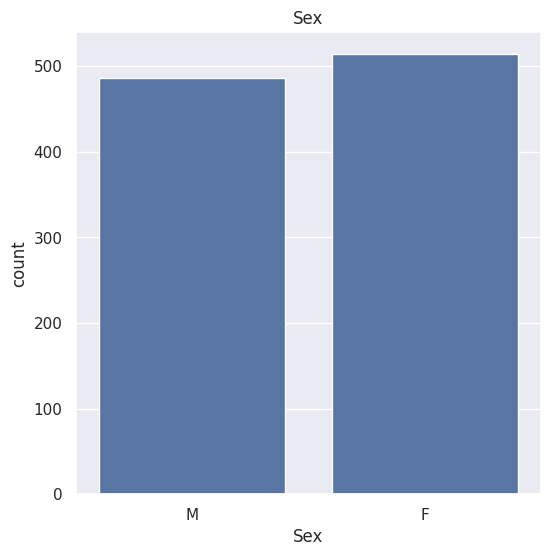

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data = insurance_dataset)
plt.title('Sex')
plt.show()

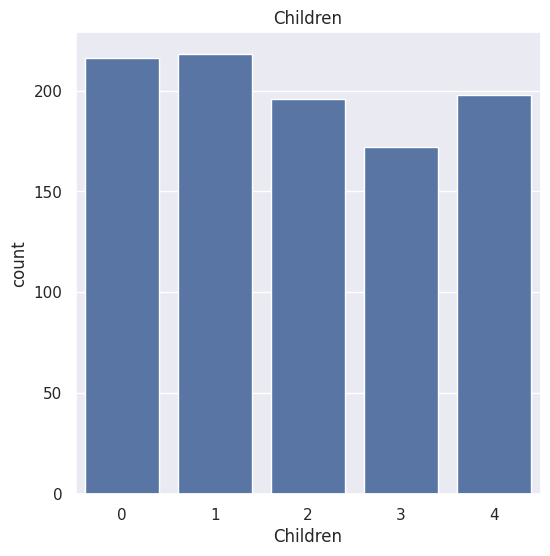

In [ ]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='Children', data = insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['Children'].value_counts()

Children
1    218
0    216
4    198
2    196
3    172
Name: count, dtype: int64

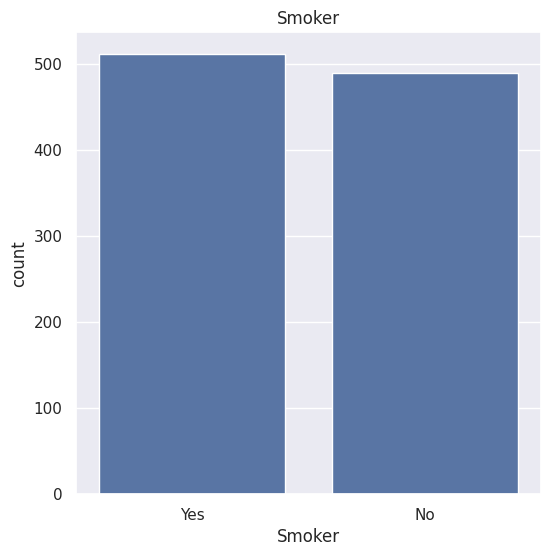

In [ ]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='Smoker', data = insurance_dataset)
plt.title('Smoker')
plt.show()

In [ ]:
insurance_dataset['Smoker'].value_counts()

Smoker
Yes    511
No     489
Name: count, dtype: int64

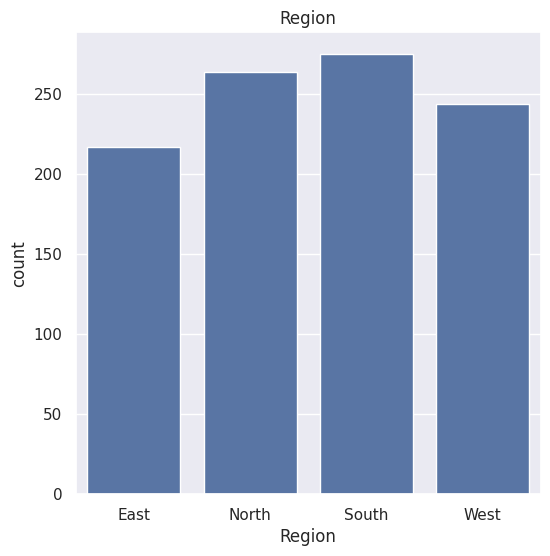

In [ ]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='Region', data = insurance_dataset)
plt.title('Region')
plt.show()

In [ ]:
insurance_dataset['Region'].value_counts()

Region
South    275
North    264
West     244
East     217
Name: count, dtype: int64

<ipython-input-26-ede0d1d56bd8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['Distance_to_Nearest_Hospital'])


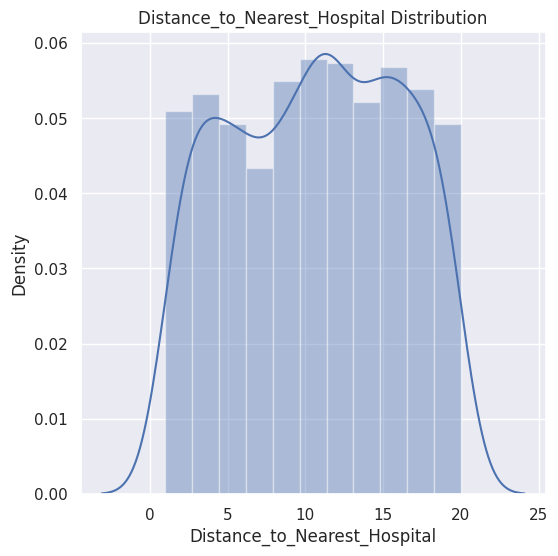

In [ ]:
# Distribution of Distance_to_Nearest_Hospital
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['Distance_to_Nearest_Hospital'])
plt.title('Distance_to_Nearest_Hospital Distribution')
plt.show()

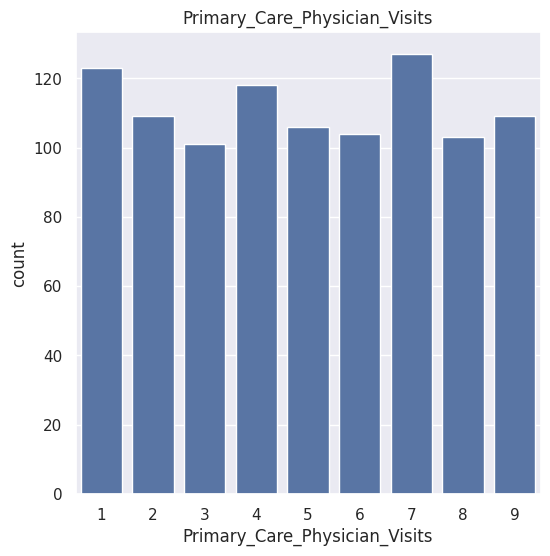

In [ ]:
#  Primary_Care_Physician_Visits column
plt.figure(figsize=(6,6))
sns.countplot(x='Primary_Care_Physician_Visits', data = insurance_dataset)
plt.title('Primary_Care_Physician_Visits')
plt.show()

In [ ]:
insurance_dataset['Primary_Care_Physician_Visits'].value_counts()

Primary_Care_Physician_Visits
7    127
1    123
4    118
9    109
2    109
5    106
6    104
8    103
3    101
Name: count, dtype: int64

<ipython-input-29-76e267fd0f65>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['Charges'])


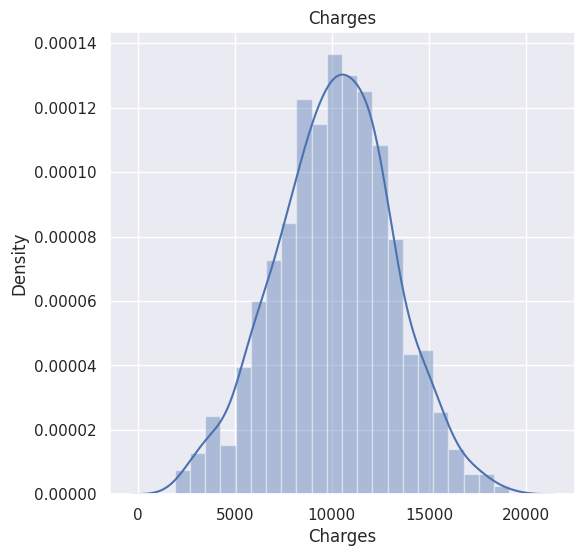

In [ ]:
# Distribution of Charges
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['Charges'])
plt.title('Charges')
plt.show()

## **Data Pre-Processing**

### Encoding the categorical features

In [ ]:
# encoding Sex column
insurance_dataset.replace({'Sex':{'M':0,'F':1}}, inplace=True)

# encoding Smoker column
insurance_dataset.replace({'Smoker':{'Yes':0,'No':1}}, inplace=True)

# encoding Region column
insurance_dataset.replace({'Region':{'East':0,'North':1,'South':2,'West':3}}, inplace=True)

# encoding Occupation column
insurance_dataset.replace({'Occupation':{'White Collar':0,'Retired':1,'Self Employed':2,'Professional':3,'Blue Collar':4,'Student':5}}, inplace=True)

# encoding Exercise_Frequency column
insurance_dataset.replace({'Exercise_Frequency':{'Rarely':0,'2 times/week':1,'Daily':2,'3 times/week':3,'Once a week':4}}, inplace=True)

# encoding Chronic_Conditions column
insurance_dataset.replace({'Chronic_Conditions':{'Heart Disease':0,'Arthritis':1,'None':2,'High Blood Pressure':3,'Diabetes':4}}, inplace=True)

# encoding Insurance_Plan_Type column
insurance_dataset.replace({'Insurance_Plan_Type':{'HMO':0,'HDHP':1,'PPO':2}}, inplace=True)

# encoding Marital_Status column
insurance_dataset.replace({'Marital_Status':{'Married':0,'Single':1}}, inplace=True)

# encoding Income_Level column
insurance_dataset.replace({'Income_Level':{'Low':0,'High':1,'Medium':2}}, inplace=True)

# encoding Family_Medical_History column
insurance_dataset.replace({'Family_Medical_History':{'Yes':0,'No':1}}, inplace=True)

# encoding Mental_Health_Status column
insurance_dataset.replace({'Mental_Health_Status':{'Poor':0,'Good':1,'Excellent':2,'Fair':3}}, inplace=True)

# encoding Prescription_Medication_Usage column
insurance_dataset.replace({'Prescription_Medication_Usage':{'Yes':0,'No':1}}, inplace=True)

# encoding Environmental_Factors column
insurance_dataset.replace({'Environmental_Factors':{'NaN':0,'Moderate':1,'High':2,'Low':3}}, inplace=True)




In [ ]:
insurance_dataset.head()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Marital_Status,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Prescription_Medication_Usage,Environmental_Factors,Charges
0,62,0,23.39610,4,0,0,0,0,0,0,0,5.112872,0,0,9,0,1,2,7604.947
1,65,0,22.03668,4,0,1,1,1,0,1,1,19.006750,1,1,3,0,0,1,7067.338
2,71,0,23.03985,1,1,1,1,0,0,0,1,9.624294,2,0,9,0,0,2,4478.128
3,18,1,24.82284,0,0,1,2,2,1,2,1,11.869340,2,0,7,0,1,2,12944.880
4,21,0,23.44420,1,1,1,3,2,1,1,1,15.146110,2,1,6,1,1,2,8275.411


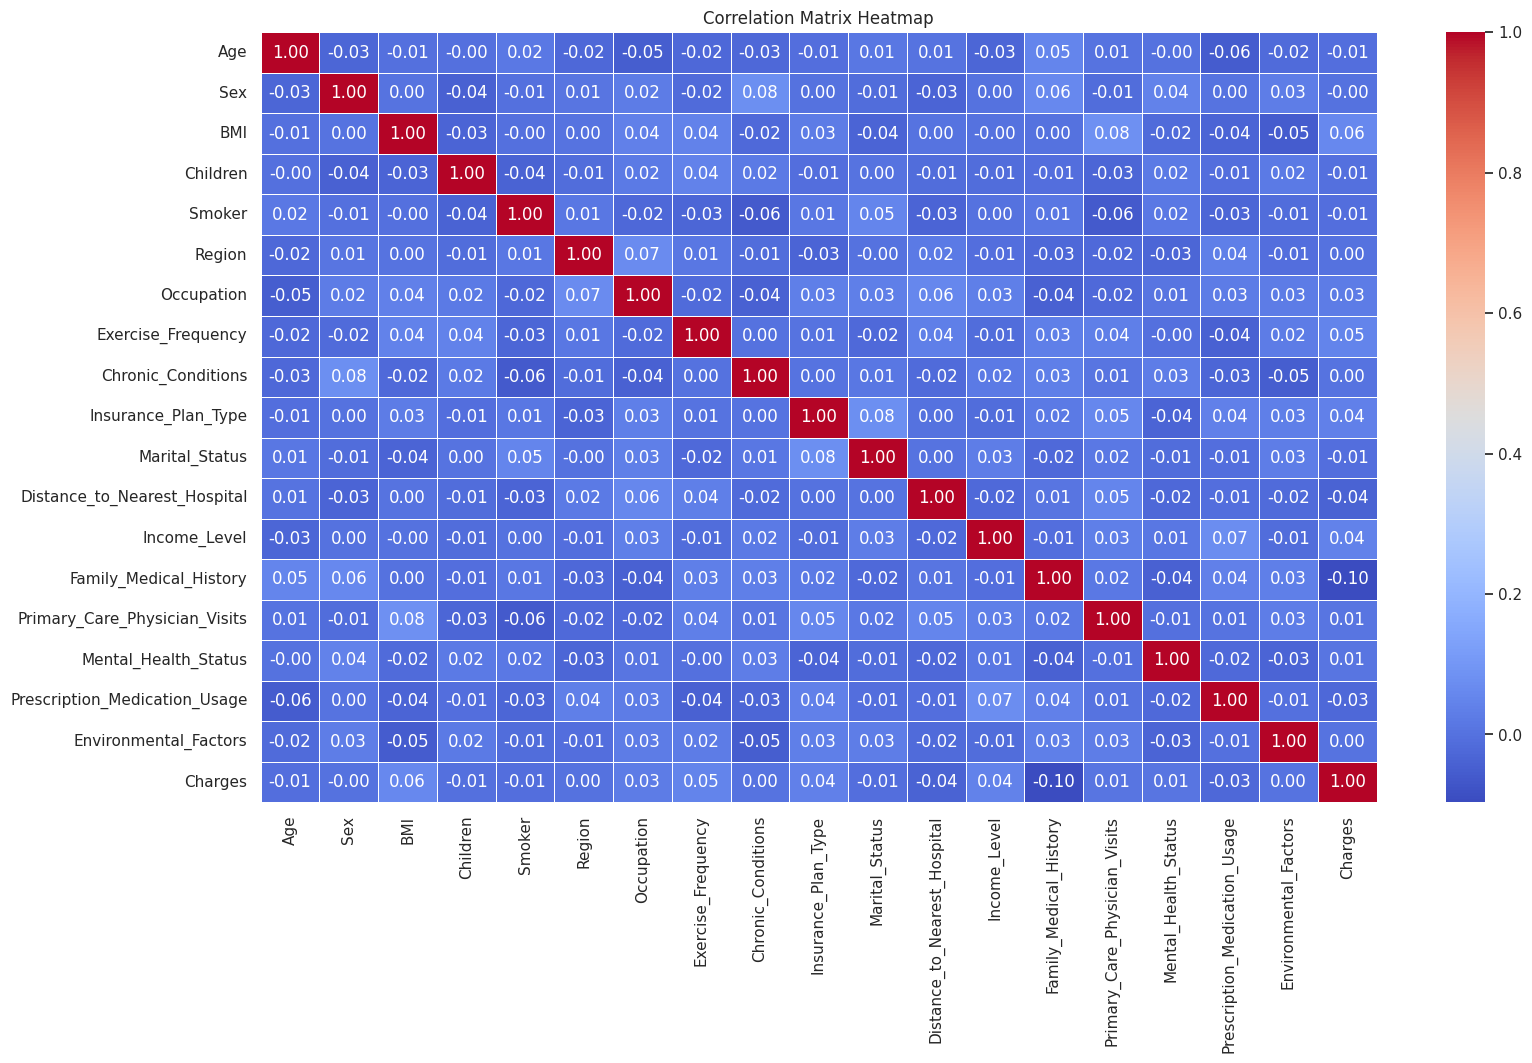

In [ ]:
# Plotting Correlation Matrix Heatmap 📊
correlation_matrix = insurance_dataset.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## **Moderate** **Positive** **Correlations**

*   **BMI (0.06)**:
    *   There is a moderate positive correlation with Charges.

*   **Exercise_Frequency (0.05)**:
    *   A moderate positive correlation with Charges.

*   **Insurance_Plan_Type (0.04)**:
    *   A moderate positive correlation with Charges.






## **Moderate Negative Correlation**

*   **Family_Medical_History (-0.10)**:
    *  There is a moderate negative correlation with Charges.

*   **Distance_to_Nearest_Hospital (-0.04)**:
    *  A moderate negative correlation with Charges.





## **Weak Correlations**

*   **Age (-0.01)**, **Children (-0.01)**, **Smoker (-0.01)**:
    *   These features exhibit weak or negligible correlations with Charges.



## **Conclusion**

In this analysis, the correlations are categorized based on their strength. The relationships identified in this report provide valuable insights into potential indicators for predicting or understanding variations in Charges. It is recommended to consider these findings in the context of your specific analysis and industry knowledge for a more comprehensive interpretation.

# **Droping not Correlated columms**

In [ ]:
insurance_dataset = insurance_dataset.drop(columns=['Sex','Region','Chronic_Conditions','Environmental_Factors'])

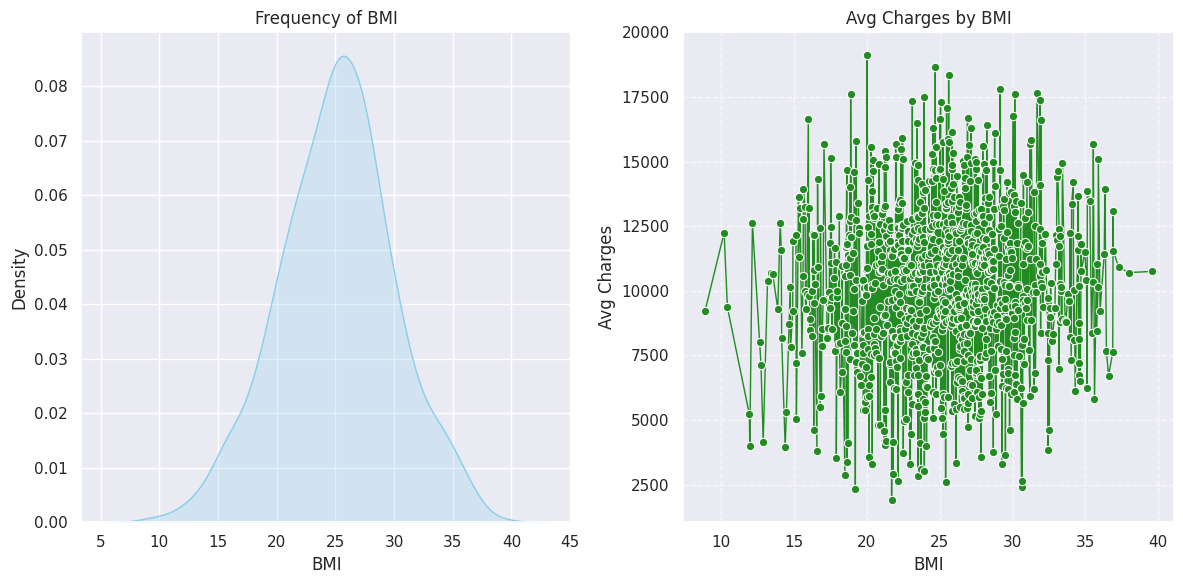

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first KDE plot
sns.kdeplot(data=insurance_dataset, x='BMI', fill=True, ax=axes[0], color='skyblue')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Density')
axes[0].set_title('Frequency of BMI')

# Plotting the second line plot
sns.lineplot(
    data=insurance_dataset, x='BMI', y='Charges',
    color='forestgreen', marker='o', linestyle='-', linewidth=1
)
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Avg Charges')
axes[1].set_title('Avg Charges by BMI')

# Add grid to the line plot
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

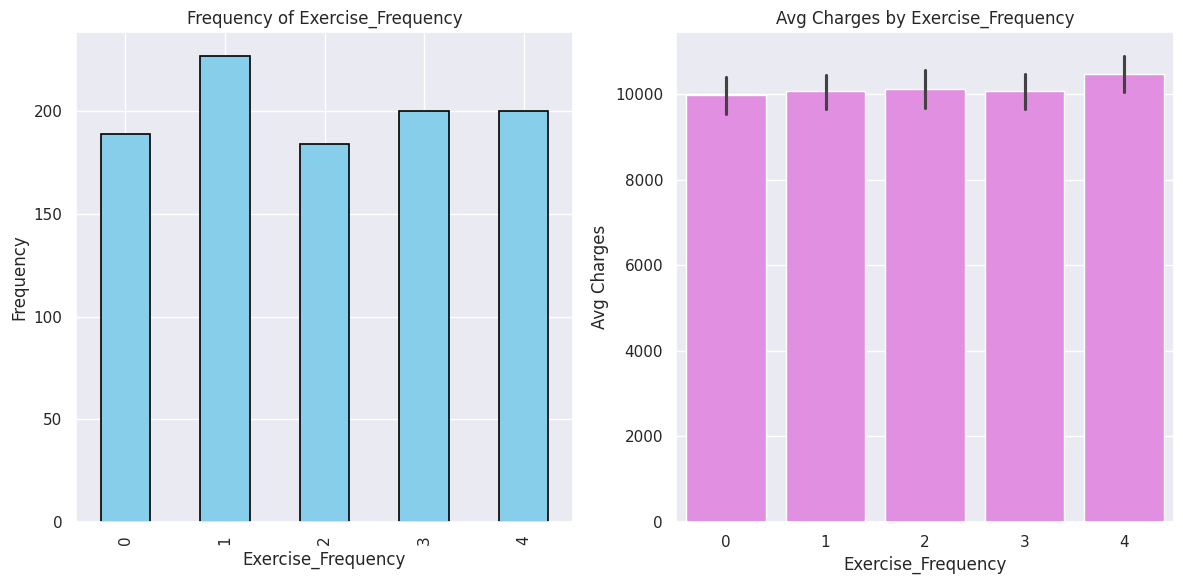

In [ ]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart
insurance_dataset['Exercise_Frequency'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='skyblue', edgecolor='black', linewidth=1.2
)
axes[0].set_xlabel('Exercise_Frequency')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Exercise_Frequency')

# Plotting the second bar chart
sns.barplot(data=insurance_dataset, x='Exercise_Frequency', y='Charges', color='violet', ax=axes[1])
axes[1].set_xlabel('Exercise_Frequency')
axes[1].set_ylabel('Avg Charges')
axes[1].set_title('Avg Charges by Exercise_Frequency')

# Adjusting the layout
plt.tight_layout()
plt.show()

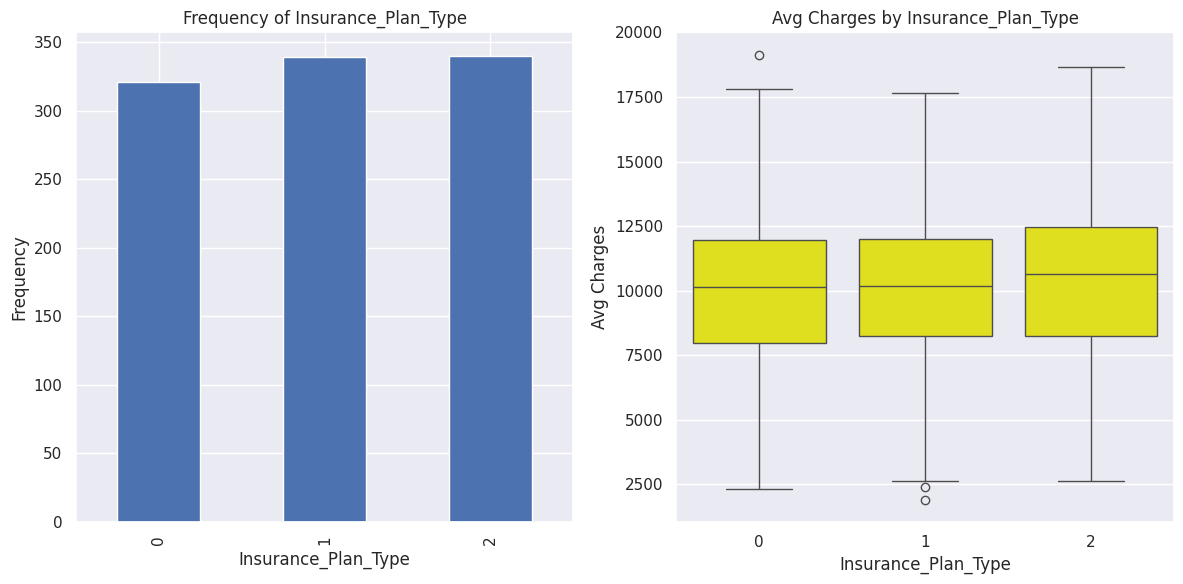

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart
insurance_dataset['Insurance_Plan_Type'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Insurance_Plan_Type')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Insurance_Plan_Type')

# Plotting the second bar chart
sns.boxplot(data=insurance_dataset, x='Insurance_Plan_Type', y='Charges', color='yellow', ax=axes[1])
axes[1].set_xlabel('Insurance_Plan_Type')
axes[1].set_ylabel('Avg Charges')
axes[1].set_title('Avg Charges by Insurance_Plan_Type')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

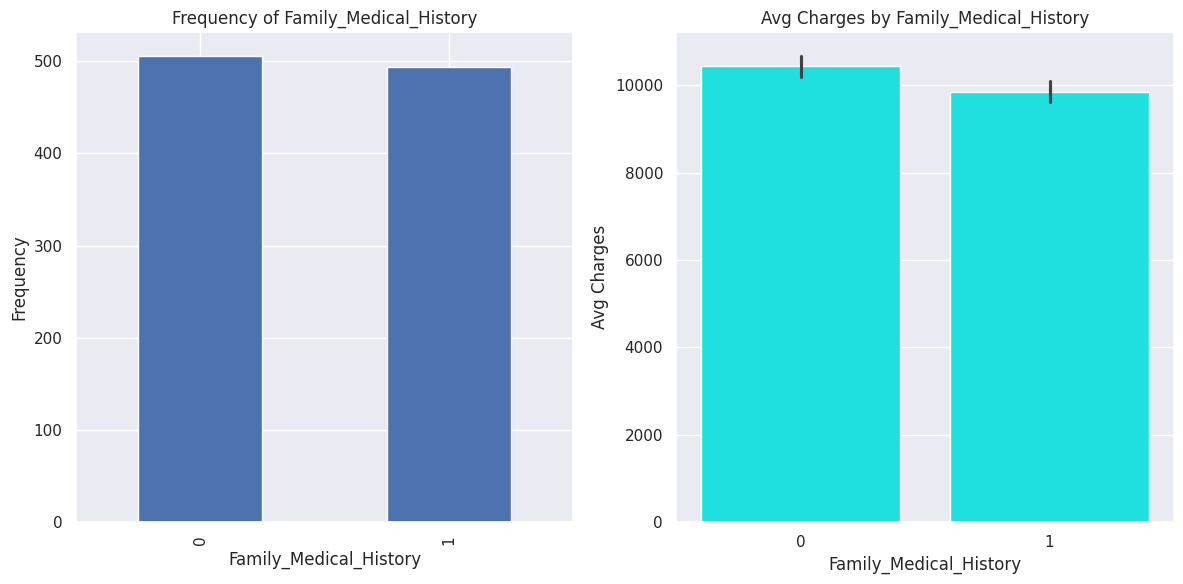

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart
insurance_dataset['Family_Medical_History'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Family_Medical_History')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Family_Medical_History')

# Plotting the second bar chart
order = insurance_dataset['Family_Medical_History'].unique()
order.sort()
sns.barplot(data=insurance_dataset, x='Family_Medical_History', y='Charges', color='cyan', order=order, ax=axes[1])
axes[1].set_xlabel('Family_Medical_History')
axes[1].set_ylabel('Avg Charges')
axes[1].set_title('Avg Charges by Family_Medical_History')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-38-ad173ec36b8f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='Charges', data=insurance_dataset, palette=palette)
<ipython-input-38-ad173ec36b8f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='Charges', data=insurance_dataset, palette=palette)
<ipython-input-38-ad173ec36b8f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='Charges', data=insurance_dataset, palette=palette)
<ipython-input-38-ad173ec36b8f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is depre

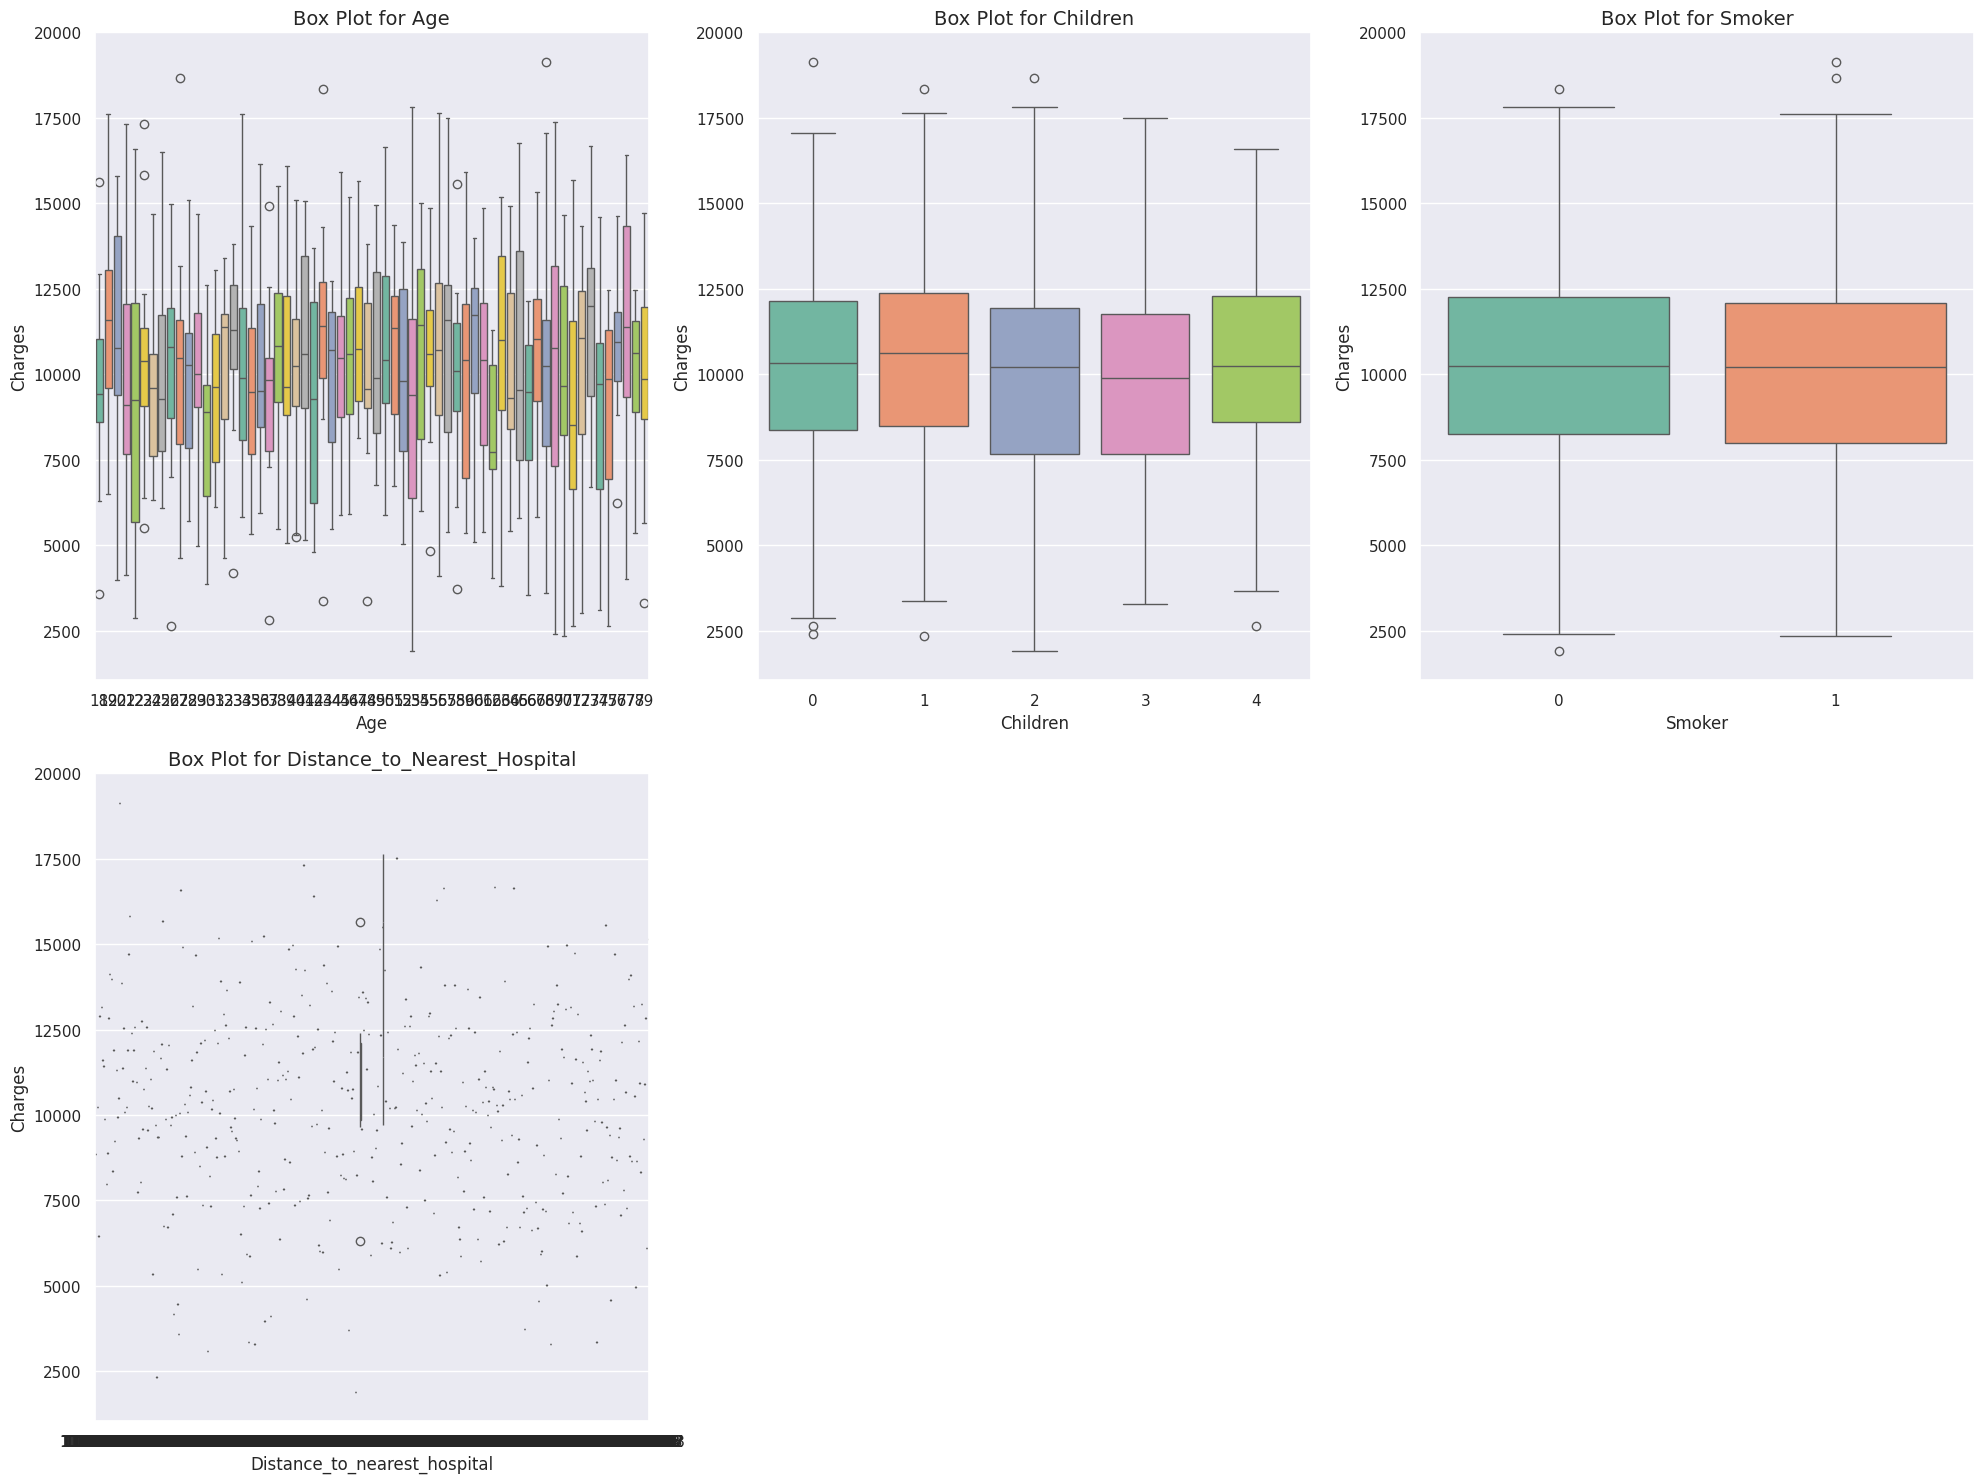

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette (you can choose a different Seaborn color palette)
palette = 'Set2'

categorical_variables = ['Age', 'Children', 'Smoker', 'Distance_to_Nearest_Hospital']

plt.figure(figsize=(20, 15))

# Loop through categorical variables
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(2, 3, i)

    # Use Seaborn's boxplot with a specified color palette
    sns.boxplot(x=variable, y='Charges', data=insurance_dataset, palette=palette)

    # Add labels and title
    plt.xlabel(variable.capitalize())  # Capitalize the variable name for better readability
    plt.ylabel('Charges')
    plt.title(f'Box Plot for {variable}', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-39-3fff5cc5b53e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=insurance_dataset, x='Charges', fill=True, palette='viridis')


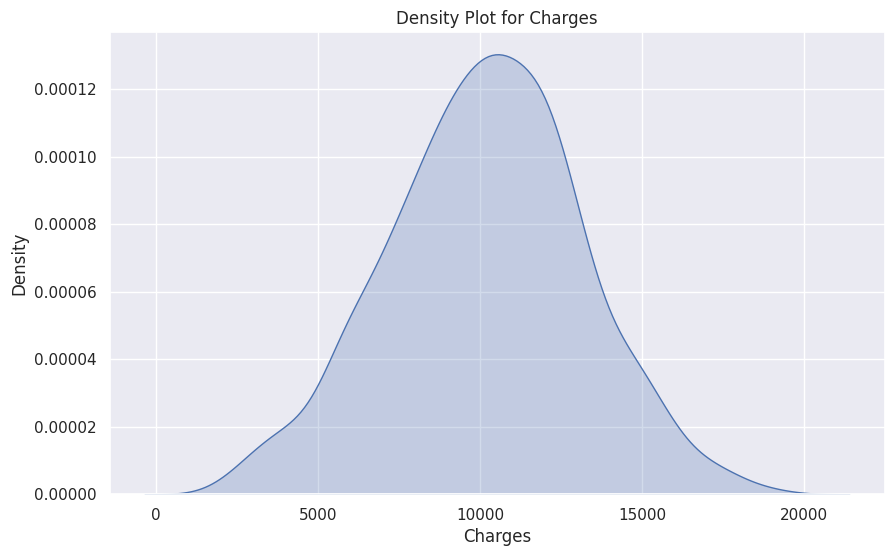

<ipython-input-39-3fff5cc5b53e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=insurance_dataset, x=variable, fill=True, palette='viridis')
<ipython-input-39-3fff5cc5b53e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=insurance_dataset, x=variable, fill=True, palette='viridis')
<ipython-input-39-3fff5cc5b53e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=insurance_dataset, x=variable, fill=True, palette='viridis')
<ipython-input-39-3fff5cc5b53e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=insurance_dataset, x=variable, fill=True, palette='viridis')
<ipython-input-39-3fff5cc5b53e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=insurance_dataset, x=variable, fill=True, palette='viridis')
<ipython-input-39-3fff5cc5b53e>:14:

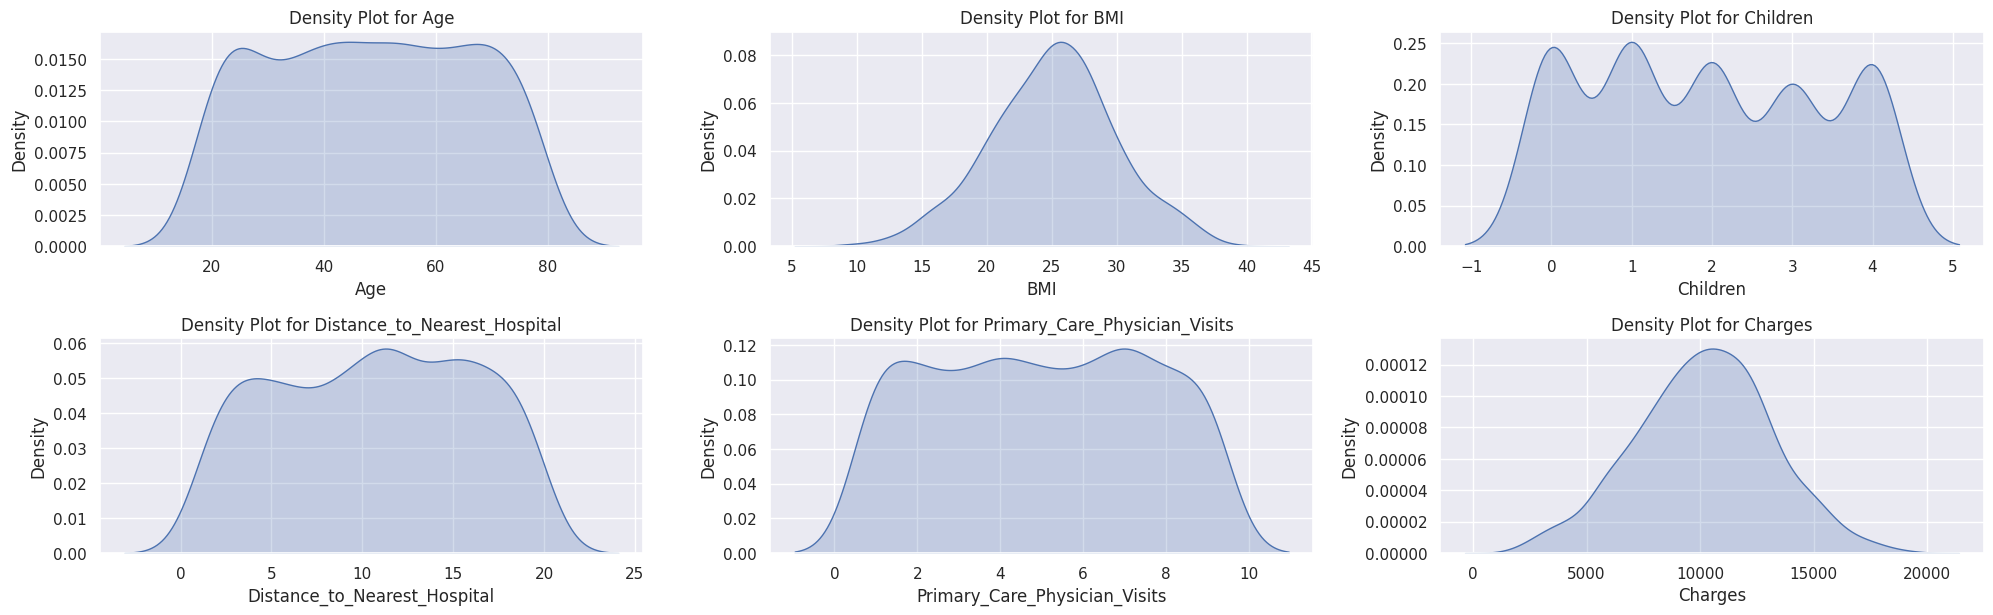

In [ ]:
# Density Plot for Dependent Variable 'Charges' 📊
plt.figure(figsize=(10, 6))
sns.kdeplot(data=insurance_dataset, x='Charges', fill=True, palette='viridis')
plt.title('Density Plot for Charges')
plt.xlabel('Charges')
plt.show()

# Density Plots for Independent Variables 📊
numeric_variables = ['Age','BMI','Children','Distance_to_Nearest_Hospital','Primary_Care_Physician_Visits',	'Charges']

plt.figure(figsize=(20, 15))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(5, 3, i)
    sns.kdeplot(data=insurance_dataset, x=variable, fill=True, palette='viridis')
    plt.title(f'Density Plot for {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

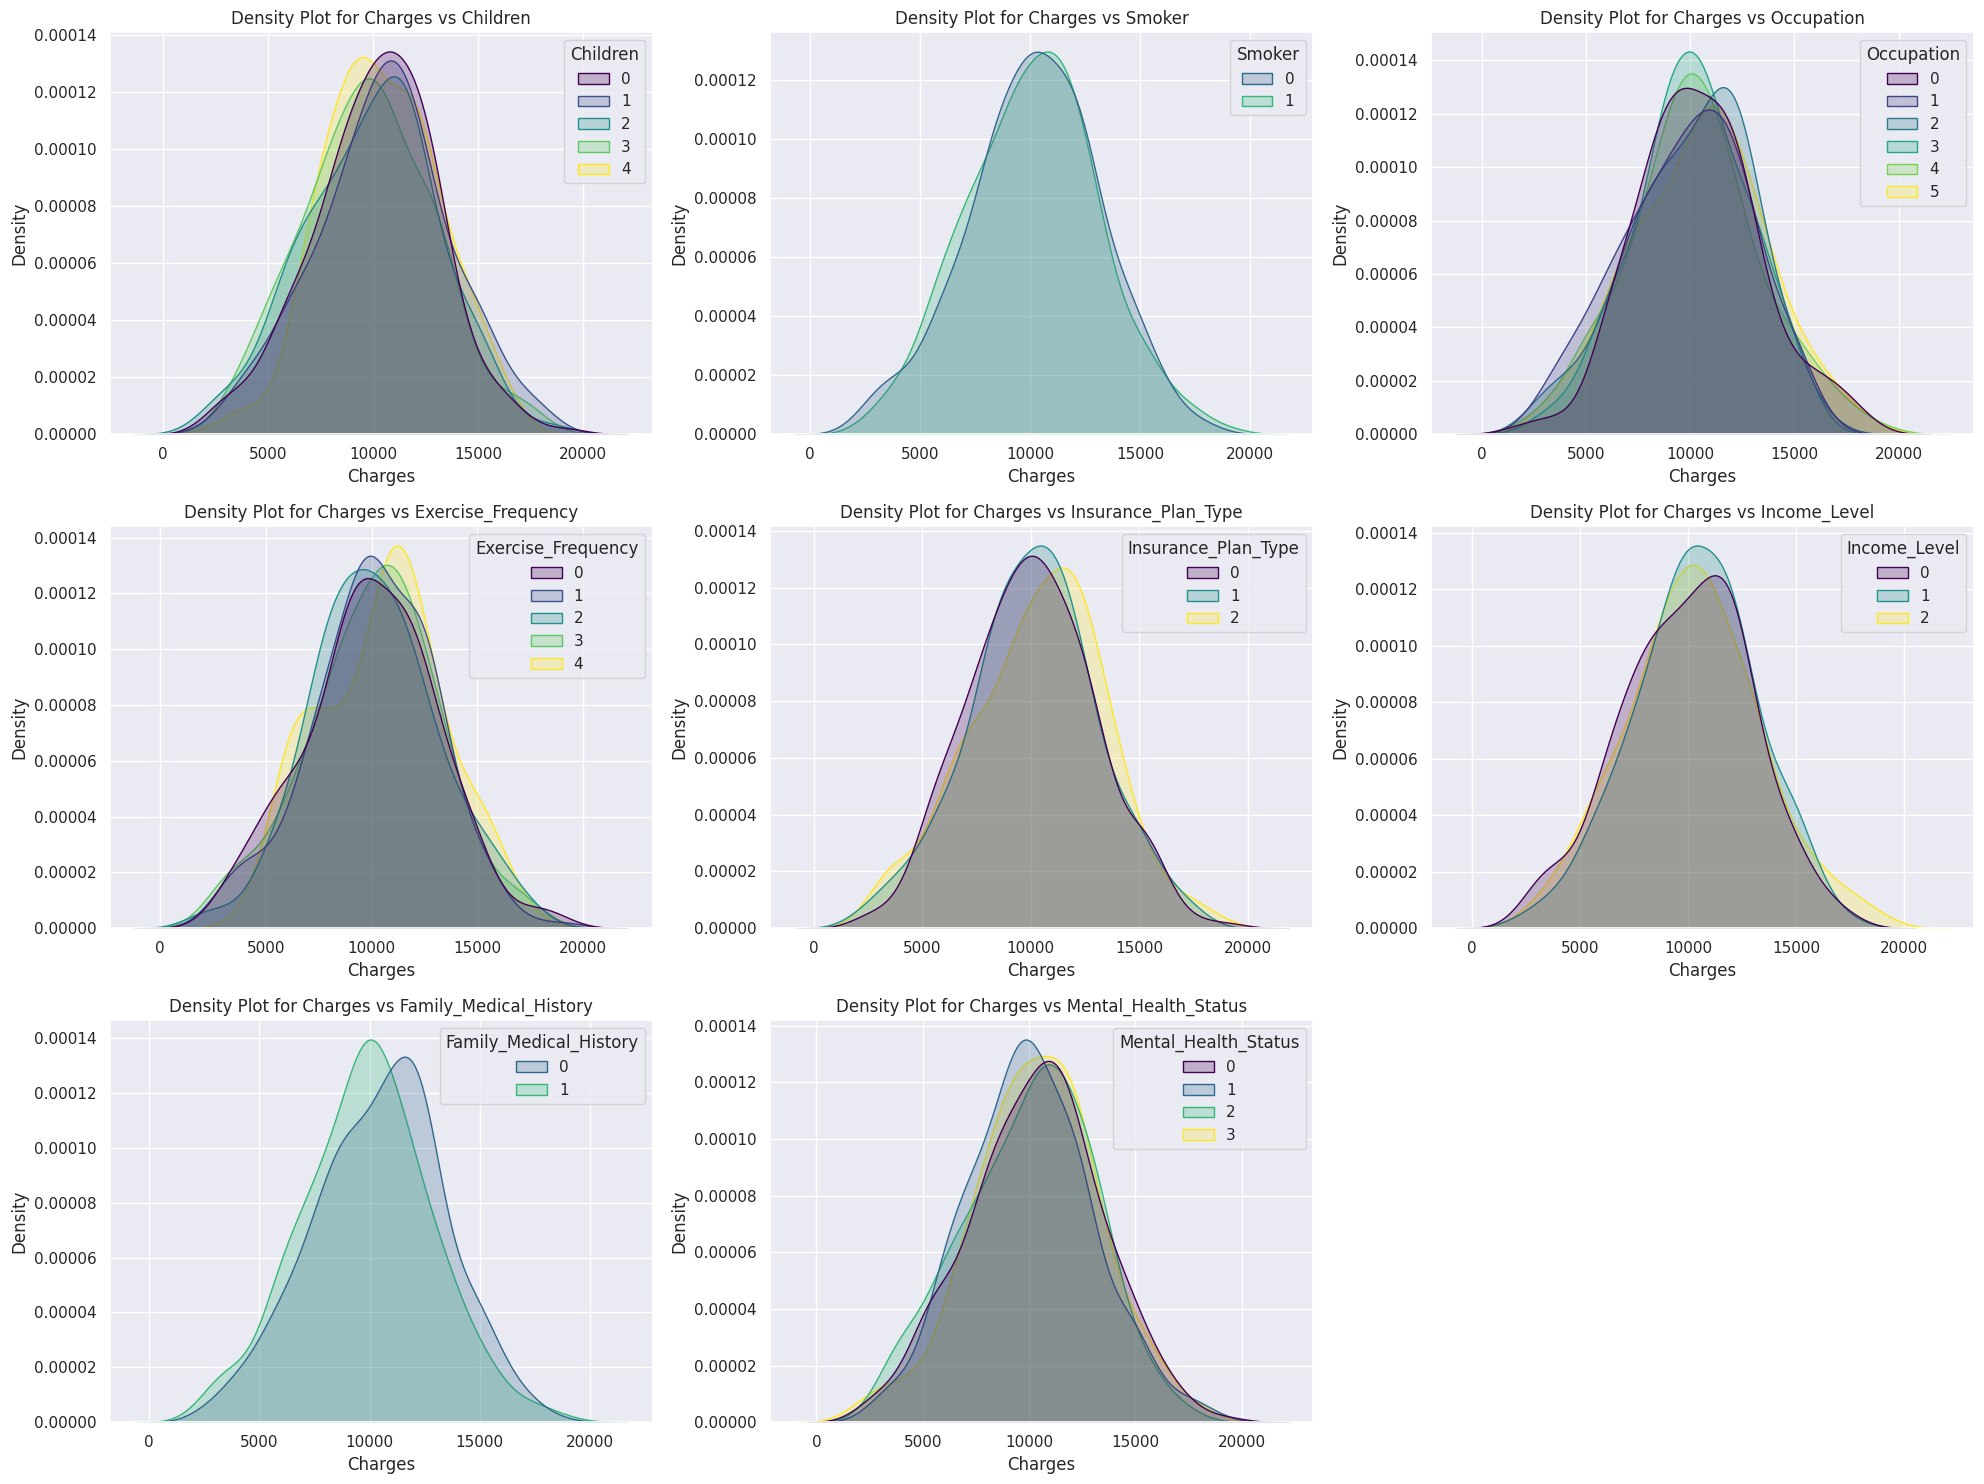

In [ ]:
# List of Categorical Variables
categorical_variables = ['Children','Smoker','Occupation','Exercise_Frequency','Insurance_Plan_Type','Income_Level','Family_Medical_History','Mental_Health_Status']

# Create Subplots for Density Plots of Categorical Variables 📊
plt.figure(figsize=(20, 15))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=insurance_dataset, x='Charges', hue=variable, fill=True, common_norm=False, palette='viridis')
    plt.title(f'Density Plot for Charges vs {variable}')
    plt.xlabel('Charges')

plt.tight_layout()
plt.show()

## Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='Charges', axis=1)
Y = insurance_dataset['Charges']

In [ ]:
print(X)

     Age       BMI  Children  Smoker  Occupation  Exercise_Frequency  \
0     62  23.39610         4       0           0                   0   
1     65  22.03668         4       0           1                   1   
2     71  23.03985         1       1           1                   0   
3     18  24.82284         0       0           2                   2   
4     21  23.44420         1       1           3                   2   
..   ...       ...       ...     ...         ...                 ...   
995   75  24.18366         3       1           4                   2   
996   24  36.91005         0       1           5                   3   
997   37  25.34770         4       0           4                   3   
998   52  26.18630         1       1           1                   4   
999   68  31.11520         1       0           4                   0   

     Insurance_Plan_Type  Marital_Status  Distance_to_Nearest_Hospital  \
0                      0               0                     

In [ ]:
print(Y)

0       7604.947
1       7067.338
2       4478.128
3      12944.880
4       8275.411
         ...    
995     7344.957
996    13072.180
997    10463.350
998     7296.749
999     7710.789
Name: Charges, Length: 1000, dtype: float64


In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# **Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Function to create and display scatter plot for each model
def scatter_plot(model_name, actual_values, predicted_values):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_values, y=predicted_values)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title(f'Actual vs Predicted Charges - {model_name}')
    plt.show()

# **1. Linear Regression:**

Linear Regression - MSE: 8837513.136325317, R-squared: 0.02112213420434661


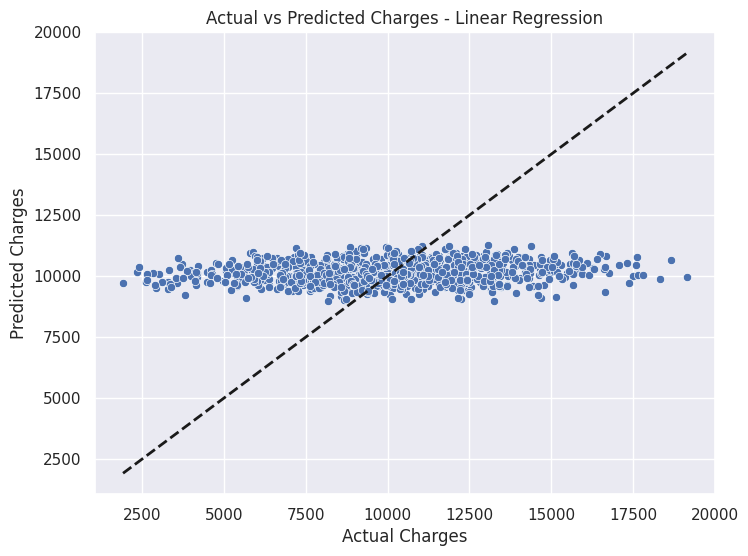

In [ ]:
# Initialize and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_scaled, Y)

# Evaluate Linear Regression model
linear_reg_predictions = linear_reg_model.predict(X_scaled)
linear_reg_mse = mean_squared_error(Y, linear_reg_predictions)
linear_reg_r2 = r2_score(Y, linear_reg_predictions)
print(f'Linear Regression - MSE: {linear_reg_mse}, R-squared: {linear_reg_r2}')

# Scatter plot for Linear Regression model
scatter_plot('Linear Regression', Y, linear_reg_predictions)

# **2. Decision Tree:**

Decision Tree - MSE: 0.0, R-squared: 1.0


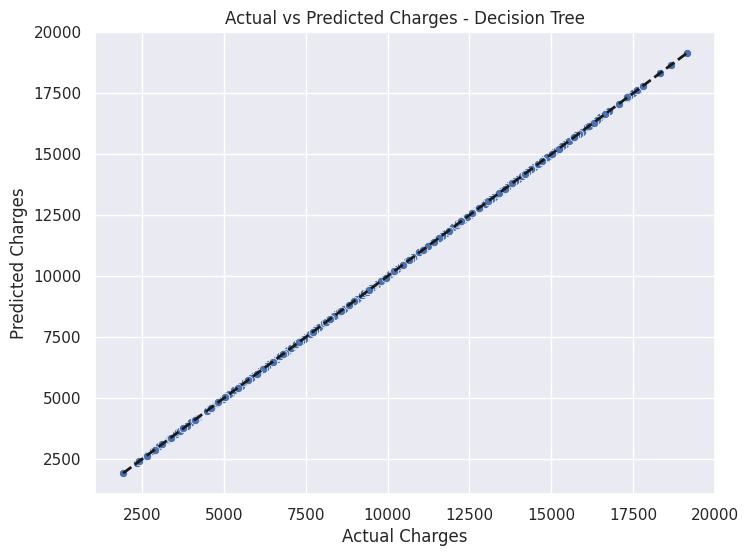

In [ ]:
# Initialize and train Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_scaled, Y)

# Evaluate Decision Tree model
decision_tree_predictions = decision_tree_model.predict(X_scaled)
decision_tree_mse = mean_squared_error(Y, decision_tree_predictions)
decision_tree_r2 = r2_score(Y, decision_tree_predictions)
print(f'Decision Tree - MSE: {decision_tree_mse}, R-squared: {decision_tree_r2}')

# Scatter plot for Decision Tree model
scatter_plot('Decision Tree', Y, decision_tree_predictions)

# **3. Random Forest:**

Random Forest - MSE: 1314218.9839304725, R-squared: 0.8544319137823755


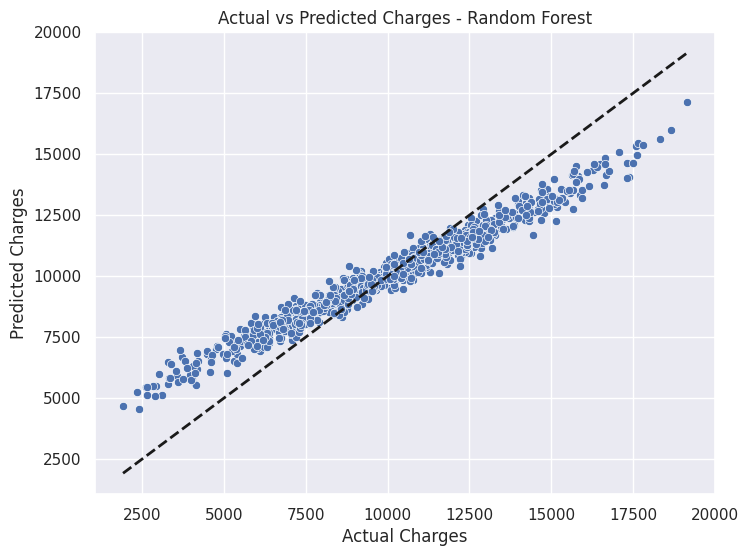

In [ ]:
# Initialize and train Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_scaled, Y)

# Evaluate Random Forest model
random_forest_predictions = random_forest_model.predict(X_scaled)
random_forest_mse = mean_squared_error(Y, random_forest_predictions)
random_forest_r2 = r2_score(Y, random_forest_predictions)
print(f'Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}')

# Scatter plot for Random Forest model
scatter_plot('Random Forest', Y, random_forest_predictions)

# **4. Support Vector Machine (SVR):**

SVR - MSE: 9028408.326024365, R-squared: -2.2171099731016497e-05


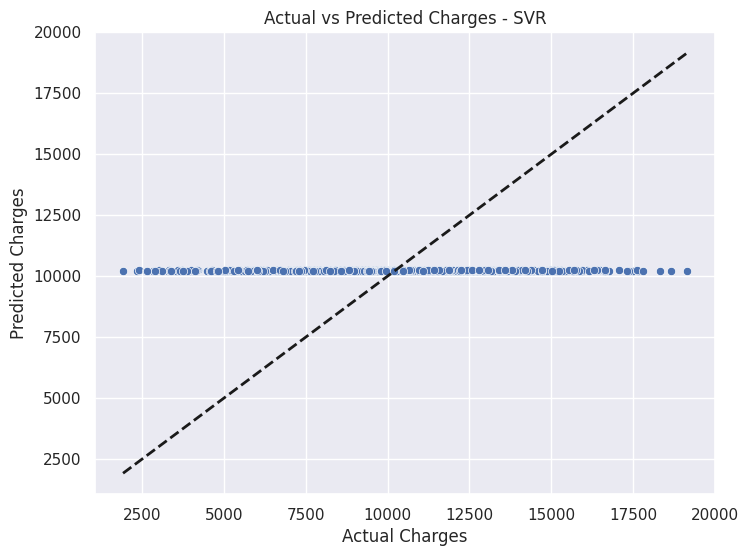

In [ ]:
# Initialize and train Support Vector Machine (SVR) model
svr_model = SVR()
svr_model.fit(X_scaled,Y)

# Evaluate SVR model
svr_predictions = svr_model.predict(X_scaled)
svr_mse = mean_squared_error(Y, svr_predictions)
svr_r2 = r2_score(Y, svr_predictions)
print(f'SVR - MSE: {svr_mse}, R-squared: {svr_r2}')

# Scatter plot for SVR model
scatter_plot('SVR', Y, svr_predictions)

# **5. XGBoost:**

XGBoost - MSE: 25507.627933542884, R-squared: 0.9971746743673324


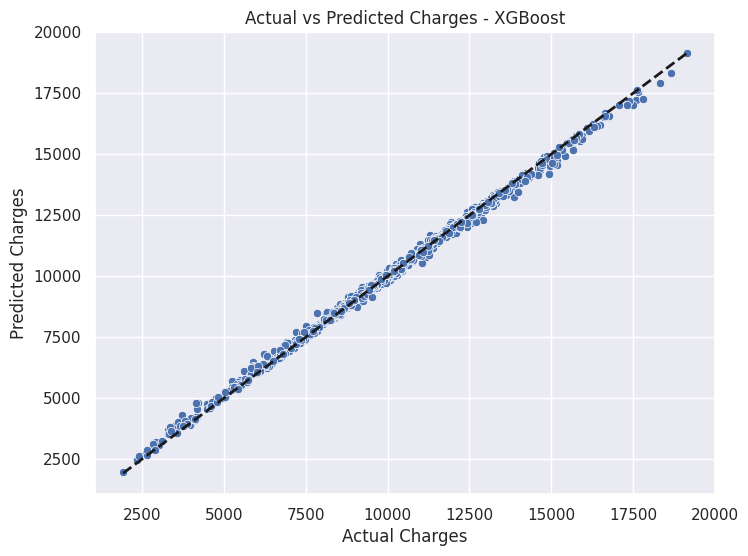

In [ ]:
# Initialize and train XGBoost model
xgboost_model = XGBRegressor()
xgboost_model.fit(X_scaled, Y)

# Evaluate XGBoost model
xgboost_predictions = xgboost_model.predict(X_scaled)
xgboost_mse = mean_squared_error(Y, xgboost_predictions)
xgboost_r2 = r2_score(Y, xgboost_predictions)
print(f'XGBoost - MSE: {xgboost_mse}, R-squared: {xgboost_r2}')

# Scatter plot for XGBoost model
scatter_plot('XGBoost', Y, xgboost_predictions)


# **6. Neural Network:**

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network - MSE: 25116843.88040634, R-squared: -1.7820408472284193


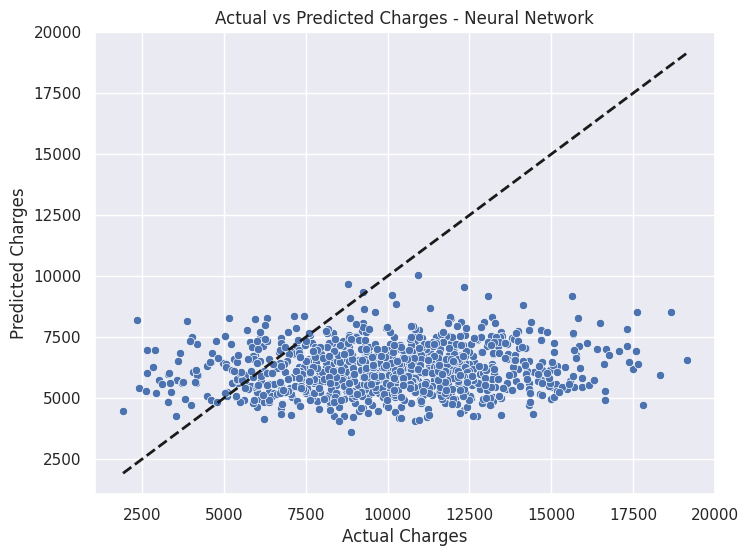

In [ ]:
 #Initialize and train Neural Network model
neural_network_model = MLPRegressor(max_iter=1000)
neural_network_model.fit(X_scaled, Y)

# Evaluate Neural Network model
neural_network_predictions = neural_network_model.predict(X_scaled)
neural_network_mse = mean_squared_error(Y, neural_network_predictions)
neural_network_r2 = r2_score(Y, neural_network_predictions)
print(f'Neural Network - MSE: {neural_network_mse}, R-squared: {neural_network_r2}')

# Scatter plot for Neural Network model
scatter_plot('Neural Network', Y, neural_network_predictions)

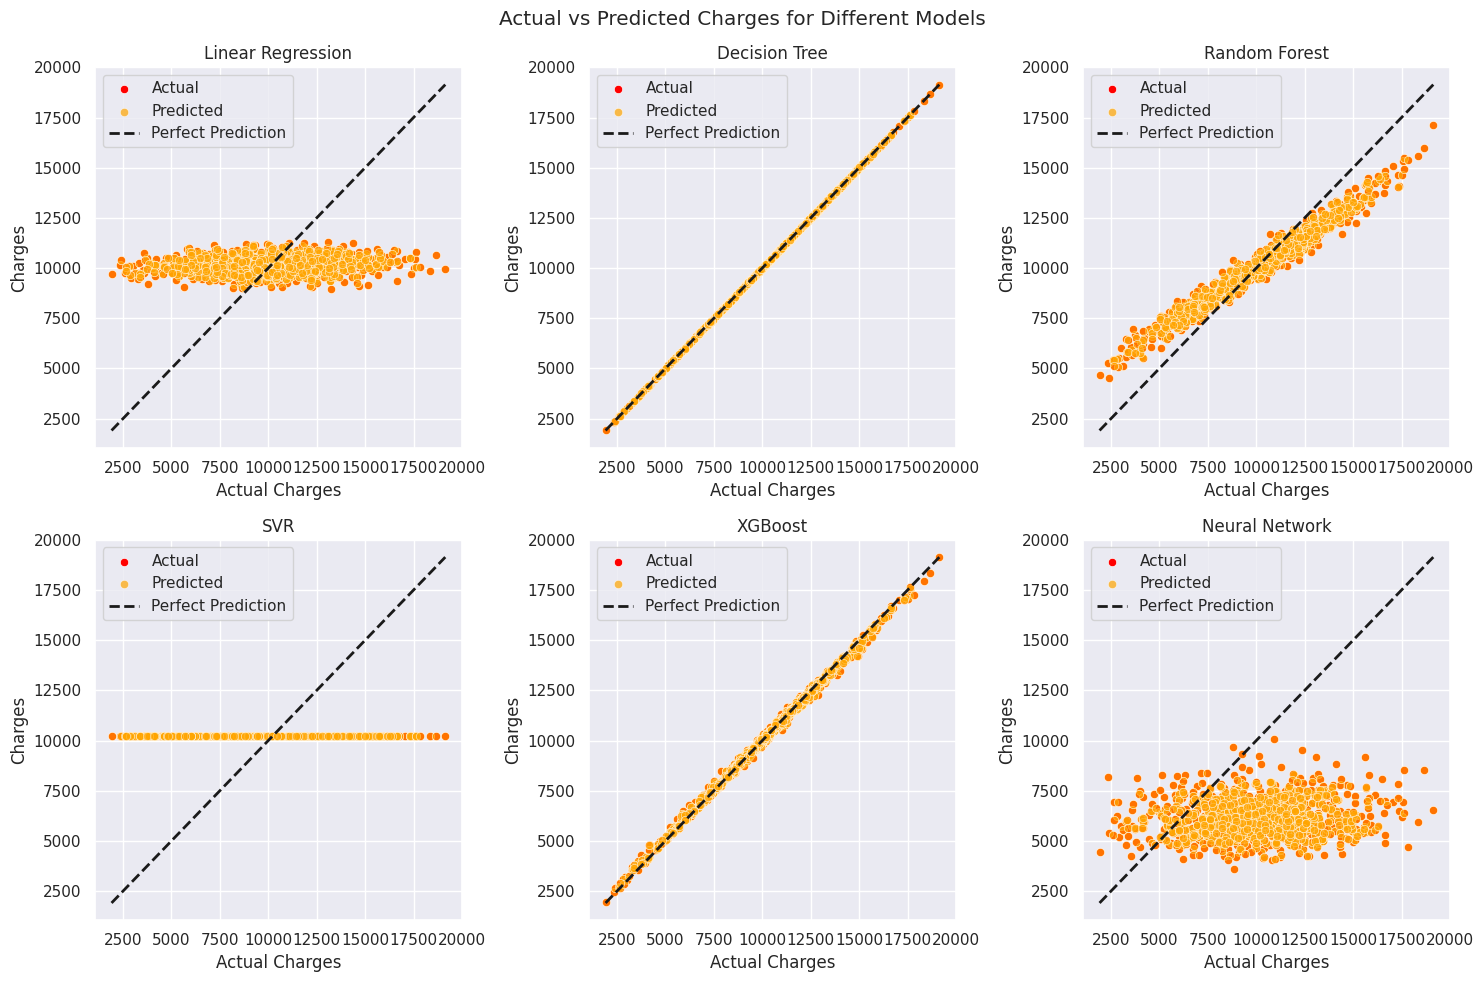

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame to store actual vs predicted values for each model
results_df = pd.DataFrame({
    'Actual': Y,
    'Linear Regression': linear_reg_predictions,
    'Decision Tree': decision_tree_predictions,
    'Random Forest': random_forest_predictions,
    'SVR': svr_predictions,
    'XGBoost': xgboost_predictions,
    'Neural Network': neural_network_predictions
})

# Create subplots for each model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Actual vs Predicted Charges for Different Models',)

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through each model and plot its scatter plot with different colors
for i, model_name in enumerate(results_df.columns[1:]):
    sns.scatterplot(x='Actual', y=model_name, data=results_df, ax=axes[i], color='red', label='Actual')
    sns.scatterplot(x='Actual', y=model_name, data=results_df, ax=axes[i], color='orange', label='Predicted', alpha=0.7)
    axes[i].plot([results_df['Actual'].min(), results_df['Actual'].max()],
                 [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2, label='Perfect Prediction')
    axes[i].set_xlabel('Actual Charges')
    axes[i].set_ylabel('Charges')
    axes[i].set_title(model_name)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame to store model names, R2 scores, MSE, and Accuracy Percentage
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Neural Network'],
    'R2 Score': [linear_reg_r2, decision_tree_r2, random_forest_r2, svr_r2, xgboost_r2, neural_network_r2],
    'MSE': [linear_reg_mse, decision_tree_mse, random_forest_mse, svr_mse, xgboost_mse, neural_network_mse]
})

# Calculate the accuracy percentage based on R2 Score
results_df['R2 Score Percentage'] = (results_df['R2 Score'] * 100).round(2)

# Find the best model (lowest MSE)
best_model = results_df.loc[results_df['MSE'].idxmin()]

# Display the results
print("Model Comparison:")
print(results_df)

print("\nBest Model:")
print(f"{best_model['Model']} has the lowest MSE: {best_model['MSE']} and the highest R2 Score: {best_model['R2 Score']}")


Model Comparison:
               Model  R2 Score           MSE  R2 Score Percentage
0  Linear Regression  0.021122  8.837513e+06                 2.11
1      Decision Tree  1.000000  0.000000e+00               100.00
2      Random Forest  0.854432  1.314219e+06                85.44
3                SVR -0.000022  9.028408e+06                -0.00
4            XGBoost  0.997175  2.550763e+04                99.72
5     Neural Network -1.782041  2.511684e+07              -178.20

Best Model:
Decision Tree has the lowest MSE: 0.0 and the highest R2 Score: 1.0
